# Prima regressione simbolica sulla funzione $\mu(k,z)$

Questo notebook si serve dello script 'function.py' per estratte $\mu$ da CLASS per vari valori di masse del neutrino, poi crea un regressore e lo allena. \
Faccio variare le masse, z e k.

In [2]:
import os
import numpy as np
from pysr import *
from matplotlib import pyplot as plt
from importlib import reload
from classy import Class
import functions as f

In [24]:
reload(f)

<module 'functions' from '/Users/ste_cartu/Documents/Università/Tesi/Repository/functions.py'>

In [ ]:
# attenzione! questa cella rimuove tutti i modelli di PySR dalla directory

import os
esecuzione = os.popen("rm hall_*")
output = esecuzione.read()

In [3]:
nk = 50
nz = 10
filepath = 'files'
nmass = 10

# creo il file con le masse dei neutini
# mass = f.Masses(0.06, 1, nmass, filepath)

In [4]:
masspath = os.path.join(filepath, 'neutrino_mass.npy')
mass = np.load(masspath)

cosmos = []
mus =  []
for i in range(nmass) :
    cosmos.append(f.DataFromCLASS(nk, nz, mass[i], filepath))
    mus.append(cosmos[i]['growth_ratio'])

zz = cosmos[0]['redshift']
kk = cosmos[0]['scale']


In [27]:
zz = cosmos[0]['redshift']
kk = cosmos[0]['scale']

mus[0].shape

(50, 10)

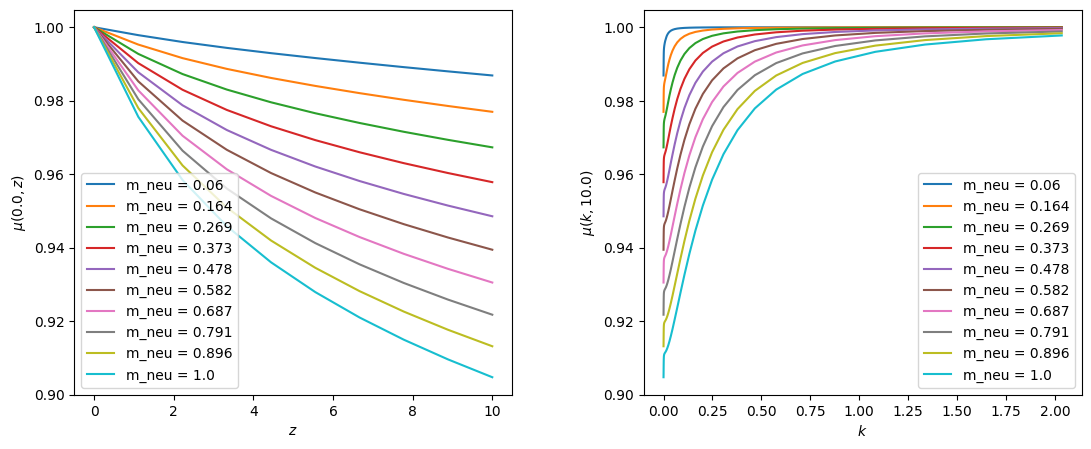

In [28]:
# plotto i mu per varie masse di neutrino in funzione di z e di k

fig, axs = plt.subplots(1, 2, figsize=(13, 5), gridspec_kw={'hspace': 0.3, 'wspace': 0.3})

for i in range(nmass) :
    string = 'm_neu = ' + str(round(mass[i], 3))
    axs[0].plot(zz, mus[i][0,:], label=string)

axs[0].set_xlabel('$z$')
axs[0].set_ylabel('$\mu( ' + str(round(kk[0], 3)) + ' ,z)$')
axs[0].legend()


for i in range(nmass) :
    string = 'm_neu = ' + str(round(mass[i], 3))
    axs[1].plot(kk, mus[i][:,-1], label=string)

axs[1].set_xlabel('$k$')
axs[1].set_ylabel('$\mu(k, ' + str(round(zz[-1], 3)) + ')$')
axs[1].legend()


plt.show()

In [6]:
model = PySRRegressor(
    binary_operators=["+", "-", "*", "/"],
    )

In [39]:
sim_mu_z = []
eq_mu_z = []
sim_mu_k = []
eq_mu_k = []

zz = zz.reshape(nz,1)
kk = kk.reshape(nk,1)

In [40]:
# alleno il regressore su mu(z) a k=10^-4
for i in range(nmass) :
    model.fit(zz, mus[i][0,:])
    sim_mu_z.append(model.predict(zz))
    eq_mu_z.append(model.sympy())

/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1793: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1261: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1793: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1261: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1793: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1261: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1793: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1261: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1793: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1261: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1793: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1261: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1793: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1261: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1793: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1261: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1793: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1261: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1793: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1261: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


In [46]:
# alleno il regressore su mu(k) a z = 10
for i in range(nmass) :
    model.fit(kk, mus[i][:,-1])
    sim_mu_k.append(model.predict(kk))
    eq_mu_k.append(model.sympy())

/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1793: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1261: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1793: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1261: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1793: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1261: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1793: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1261: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1793: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1261: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1793: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1261: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1793: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1261: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1793: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1261: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1793: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1261: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1793: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1261: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


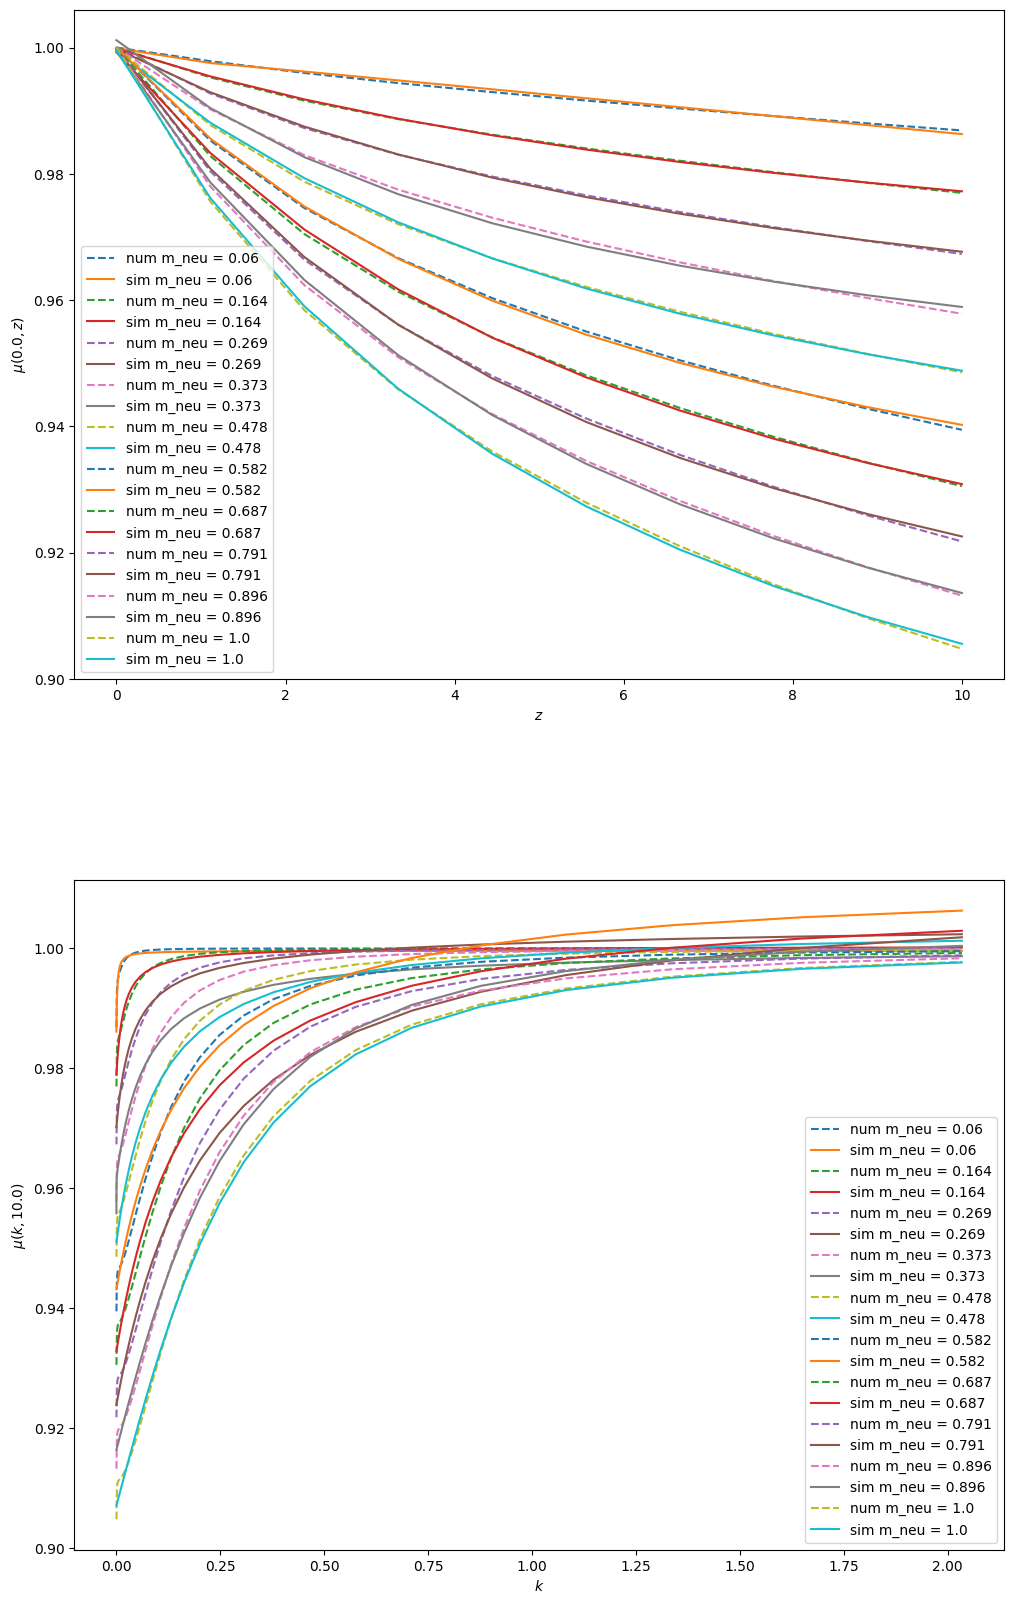

In [48]:
# plotto i mu simulati per varie masse di neutrino in funzione di z e di k

fig, axs = plt.subplots(2, 1, figsize=(12, 20), gridspec_kw={'hspace': 0.3, 'wspace': 0.3})

for i in range(nmass) :
    title1 = 'num m_neu = ' + str(round(mass[i], 3))
    axs[0].plot(zz, mus[i][0,:], label=title1, linestyle='--')
    title2 = 'sim m_neu = ' + str(round(mass[i], 3))
    axs[0].plot(zz, sim_mu_z[i], label=title2)

axs[0].set_xlabel('$z$')
axs[0].set_ylabel('$\mu( ' + str(round(kk[0,0], 3)) + ' ,z)$')
axs[0].legend()


for i in range(nmass) :
    title1 = 'num m_neu = ' + str(round(mass[i], 3))
    axs[1].plot(kk, mus[i][:,-1], label=title1, linestyle='--')
    title2 = 'sim m_neu = ' + str(round(mass[i], 3))
    axs[1].plot(kk, sim_mu_k[i], label=title2)

axs[1].set_xlabel('$k$')
axs[1].set_ylabel('$\mu(k, ' + str(round(zz[-1,0], 3)) + ')$')
axs[1].legend()


plt.show()